In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df1 = pd.read_csv('lichess_games_1_cleaned.csv')

In [3]:
df1.drop(columns = 'Unnamed: 0', inplace = True)
df1

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_move_count
0,13,outoftime,white,Rapid,1500,1191,D10,Slav Defense: Exchange Variation,5
1,16,resign,black,Blitz,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,Blitz,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,Rapid,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,Classical,1523,1469,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,Rapid,1691,1220,A80,Dutch Defense,2
20054,82,mate,black,Rapid,1233,1196,A41,Queen's Pawn,2
20055,35,mate,white,Rapid,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,109,resign,white,Rapid,1360,1227,B07,Pirc Defense,4


In [7]:
turns_mean = df1['turns'].mean()
turns_min = df1['turns'].min()
turns_max = df1['turns'].max()

In [8]:
#actually not interested in any games less than 5 turns, as this would be indicative of an unneccessary resignation
#or an unforgivable early blunder such as a 'Scholar's Mate
temp = df1.loc[df1['turns'] == turns_min]
df1 = df1.loc[df1['turns'] >=5]

In [9]:
df1 #Good still plenty of games to work with

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_move_count
0,13,outoftime,white,Rapid,1500,1191,D10,Slav Defense: Exchange Variation,5
1,16,resign,black,Blitz,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,Blitz,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,Rapid,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,Classical,1523,1469,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,Rapid,1691,1220,A80,Dutch Defense,2
20054,82,mate,black,Rapid,1233,1196,A41,Queen's Pawn,2
20055,35,mate,white,Rapid,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,109,resign,white,Rapid,1360,1227,B07,Pirc Defense,4


(array([ 1620.,     0.,     0., 10896.,     0.,     0.,  6310.,     0.,
            0.,   890.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

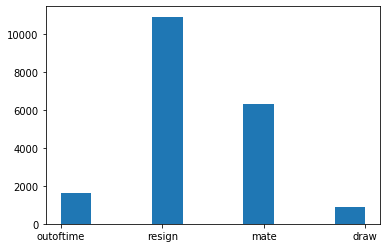

In [10]:
#let's check out the different victory status conditions
vs_oot = df1.loc[df1['victory_status'] == 'outoftime']
vs_resign = df1.loc[df1['victory_status'] == 'resign']
vs_mate = df1.loc[df1['victory_status'] == 'mate']
vs_draw = df1.loc[df1['victory_status'] == 'draw']

plt.hist(df1['victory_status'])

This is unnexpected. I had expected a lot more draws, but perhaps it is because I am looking at all games. Lower level players are known to be less likely to draw and more likely to make mistakes therefore leaving the boardstate uneven. I am curious to know if I increase the ELO rating if we would be likely to see more draws.

In [11]:
#picking an arbitrary number of 1900
df_high_elo_white = df1.loc[df1['white_rating'] >= 1900]
df_high_elo_black = df1.loc[df1['black_rating'] >= 1900]

In [12]:
df2 = pd.concat([df_high_elo_white,df_high_elo_black]).drop_duplicates().reset_index(drop=True)

(array([2643.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  849.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  224.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  334.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ]),
 <a list of 50 Patch objects>)

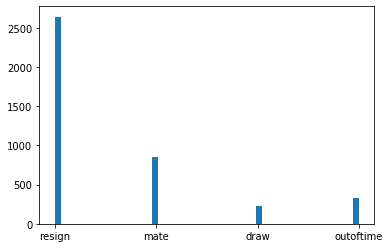

In [13]:
plt.hist(df2['victory_status'], bins = 50)
#hm, it still seems like there are a low amount of draws here. Let's check the amount of time outs in comparison


In [14]:
print(len(vs_oot))
print(len(vs_draw))
#still inconclusive, moving on to the meat of our operation, openings

1620
890


Going to create a second dataframe of just the opening ecos for ease of use, this data frame will be off of a pivot table aggregating on size in order to get the number of games played

In [98]:
#This isn't working out as planned...let me try to create a new dataframe from the opening ecos

df_just_eco = pd.DataFrame(df1, columns= ['opening_eco'])

df_just_eco = df_just_eco.pivot_table(index=['opening_eco'], aggfunc='size')
column_names = ['Eco', 'Games']
df_just_eco = pd.DataFrame(df_just_eco)
df_just_eco.reset_index(inplace = True)
df_just_eco.columns = column_names
print(df_just_eco)

     Eco  Games
0    A00    937
1    A01    154
2    A02     65
3    A03     75
4    A04    276
..   ...    ...
360  E92      5
361  E94      6
362  E95      1
363  E97      3
364  E98      2

[365 rows x 2 columns]


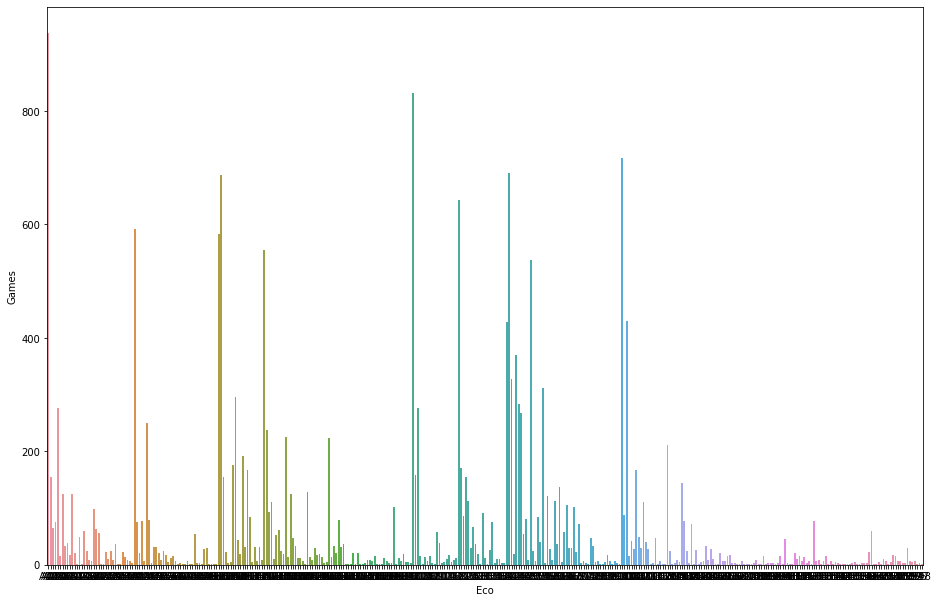

In [108]:
#doing a general sweep of all of the openings, using opening_eco for it's shorter label
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_just_eco, x = 'Eco', y = 'Games', ax = ax,)
plt.show()

let's grab all of the games that have at least 50 plays, for now, and see how it goes

In [109]:
df_just_eco = df_just_eco.loc[df_just_eco['Games'] >=50]

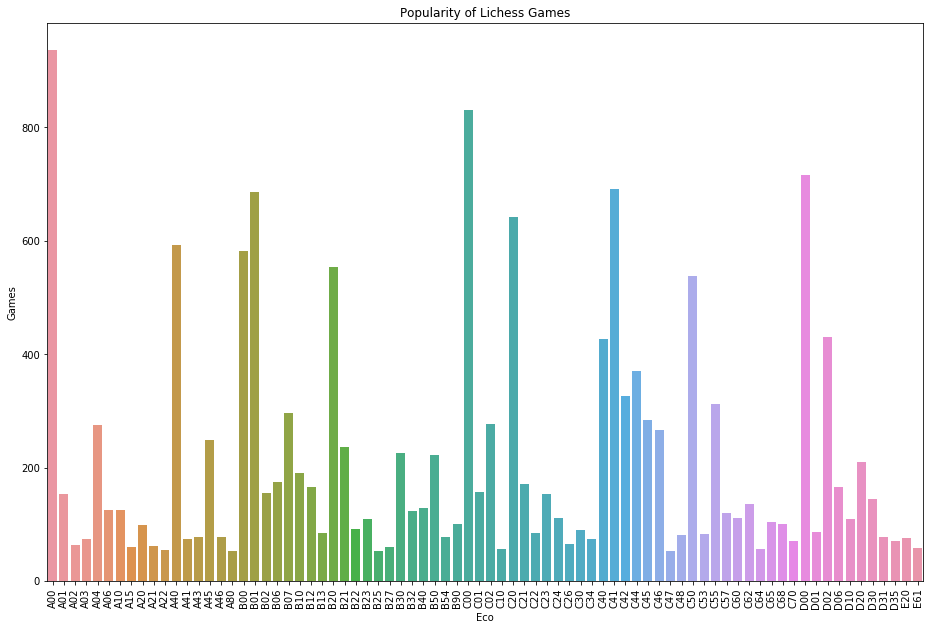

In [120]:
#This is slightly more legible
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_just_eco, x = 'Eco', y = 'Games', ax = ax,).set_xticklabels(rotation=90, labels = df_just_eco['Eco'])
plt.title('Popularity of Lichess Games')
plt.show()

Seems like There are definitely openings that are astoundingly more popular than other openings. Let's create a smaller graph and focus on these for now

In [121]:
df_most_popular = df_just_eco.loc[df_just_eco['Games']>=200]

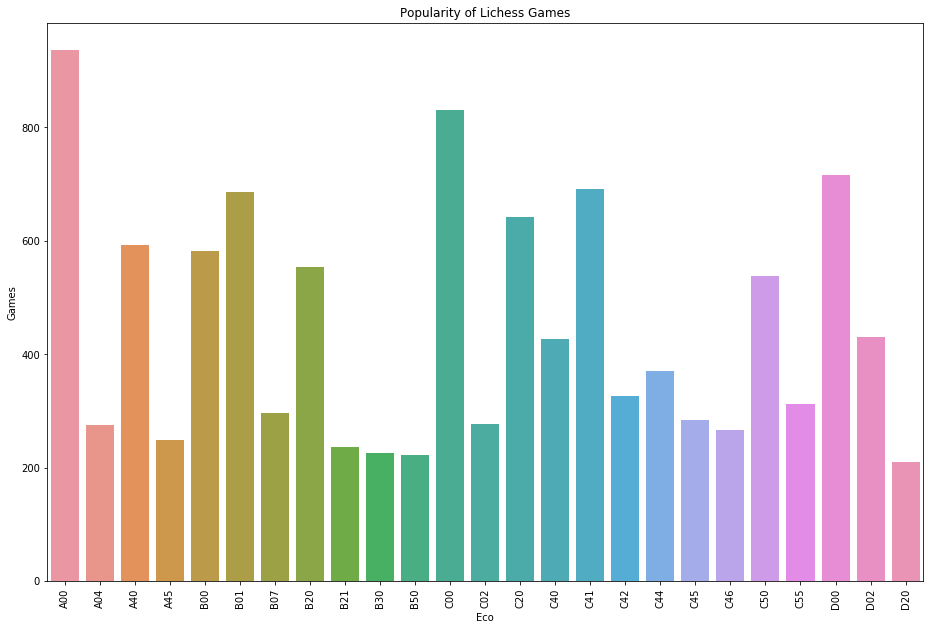

In [123]:
#copy pasting the plot from above
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_most_popular, x = 'Eco', y = 'Games', ax = ax,).set_xticklabels(rotation=90, labels = df_most_popular['Eco'])
plt.title('Popularity of Lichess Games')
plt.show()

In [137]:
popular_list = []
for i in df_most_popular['Eco']:
    popular_list.append(i)
print(popular_list)

['A00', 'A04', 'A40', 'A45', 'B00', 'B01', 'B07', 'B20', 'B21', 'B30', 'B50', 'C00', 'C02', 'C20', 'C40', 'C41', 'C42', 'C44', 'C45', 'C46', 'C50', 'C55', 'D00', 'D02', 'D20']


In [142]:
#let's create a list of these openings and then subset our inital dataframe to get more focused data
df_sub_mp = df1[df1['opening_eco'].isin(popular_list)]

In [143]:
df_sub_mp

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_move_count
1,16,resign,black,Blitz,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,Blitz,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,Rapid,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,Classical,1523,1469,C41,Philidor Defense,5
6,33,resign,white,Rapid,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...
20051,58,mate,black,Rapid,1237,1231,C00,French Defense: Knight Variation,3
20052,37,resign,white,Rapid,1219,1250,A40,English Defense,4
20055,35,mate,white,Rapid,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,109,resign,white,Rapid,1360,1227,B07,Pirc Defense,4


In [262]:
#saving this dataframe for later use and to look at it in excel
#df_sub_mp.to_csv('most_popular_over_200_games.csv')

It turns out that the most common opening using the eco code ('Encyclopedia of Chess Openings') is the A00, which stands for an 'uncommon' opening. This may be because players are interested in playing outside of the norm or because players are unfamiliar with proper chess theory and are therefore playing move orders that are not yet inherited to be standard play. This is an incredible find and I would like to delve into it more, however, in the future we will need to drop A00, because it is made up of dozens of varients and does not accurately depict a certain opening strategy, however, for now we can check out the wins for each game. Once we dive deeper into the general statistics, we will begin from the top and organize the data based on the player ratings

In [263]:
df_winning = pd.DataFrame(df_sub_mp, columns= ['opening_eco', 'winner'])

df_winning = df_winning.pivot_table(index=['opening_eco', 'winner'], aggfunc='size')
column_names = ['Eco', 'Winner', 'Wins']
df_winning = pd.DataFrame(df_winning)
df_winning.reset_index(inplace = True)
df_winning.columns = column_names
df_winning = df_winning[df_winning['Winner'].isin(['black', 'white'])]
print(df_winning)

    Eco Winner  Wins
0   A00  black   537
2   A00  white   361
3   A04  black    98
5   A04  white   153
6   A40  black   251
8   A40  white   323
9   A45  black   134
11  A45  white   101
12  B00  black   215
14  B00  white   341
15  B01  black   321
17  B01  white   341
18  B07  black   114
20  B07  white   165
21  B20  black   313
23  B20  white   217
24  B21  black   107
26  B21  white   120
27  B30  black   122
29  B30  white    97
30  B50  black   112
32  B50  white    98
33  C00  black   387
35  C00  white   406
36  C02  black   131
38  C02  white   132
39  C20  black   330
41  C20  white   292
42  C40  black   166
44  C40  white   250
45  C41  black   267
47  C41  white   396
48  C42  black   135
50  C42  white   179
51  C44  black   171
53  C44  white   193
54  C45  black   128
56  C45  white   143
57  C46  black   107
59  C46  white   149
60  C50  black   268
62  C50  white   240
63  C55  black   131
65  C55  white   165
66  D00  black   340
68  D00  white   340
69  D02  blac

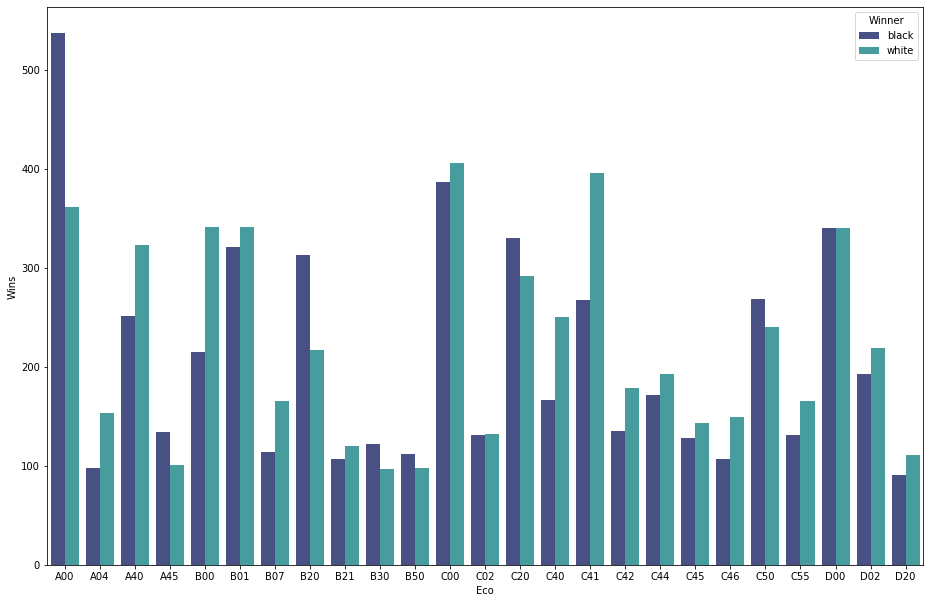

In [264]:
#Let's look at the ratios
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_winning, x = 'Eco', y = 'Wins', hue = 'Winner', palette = 'mako')

WOW! We see here that there are some particular patterns that stand out, the openings in A00, the uncommon openings, have black winning most of the games. This leans me to hypothesis that having a solid opening plan when playing is best for players if they are trying to win, although more analysis is needed.  We have a few standouts, such as A40, A04 B00, B07, C40, C41, as games that stand out as dominate white games. Also a few dominate black positions, aside from the uncommong games in A00, we have  A45, B20(WOW!), C20(Which is a personal variate of mine off of the english c4, d5, cxd5, Qxd5, Nf3) and that's about it, as expected. Again, black is expected to draw it's games, so we may even want to add draws to blacks wins in another variation of the dataset. Actually why don't we do that now.

In [265]:
df_drawsasblack = None

In [266]:
df_draws = pd.DataFrame(df_sub_mp, columns= ['opening_eco', 'winner'])

df_draws = df_draws.pivot_table(index=['opening_eco', 'winner'], aggfunc='size')
df_draws = pd.DataFrame(df_draws)
column_names = ['Eco', 'Winner', 'Wins']
df_draws.reset_index(inplace = True)
df_draws.columns = column_names
df_draws = df_draws[df_draws['Winner'].isin(['draw'])]



In [267]:
addition = []
for i in df_draws['Wins']:
    addition.append(i)
print(addition)
df_winning.reset_index(inplace = True, drop = True)

[39, 25, 18, 15, 27, 25, 17, 24, 10, 7, 13, 38, 14, 21, 12, 28, 13, 6, 13, 11, 30, 16, 37, 18, 9]


In [260]:
#can't figure it out so I guess I'll do it manually
for i in range(0, len(df_winning[df_winning['Winner'] == 'black'])):
    print(i)
    df_winning['Wins'][i] += addition[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


C:\Users\elyse\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [261]:
df_winning

,Eco,Winner,Wins
0,A00,black,576
1,A00,white,386
2,A04,black,116
3,A04,white,168
4,A40,black,278
5,A40,white,348
6,A45,black,151
7,A45,white,125
8,B00,black,225
9,B00,white,348
